In [1]:
%pylab inline
%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spiketag.analysis import *
from ipywidgets import interact

/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import seaborn as sns
from spiketag.mvc.Control import controller
from spiketag.base import probe
from spiketag.utils import decoder_viewer

## Load pc

In [4]:
pos = np.fromfile('./dusty_pos.bin').reshape(-1,2)
pc = place_field(pos=pos, t_step=33.33e-3)

In [5]:
replay_offset = 2.004
start = 320
end   = 2500

In [6]:
pc.align_with_recording(start, end, replay_offset)

In [7]:
bin_size = 4
v_cutoff = 25
pc.initialize(bin_size=bin_size, v_cutoff=v_cutoff)

In [8]:
pc(t_step=100e-3)

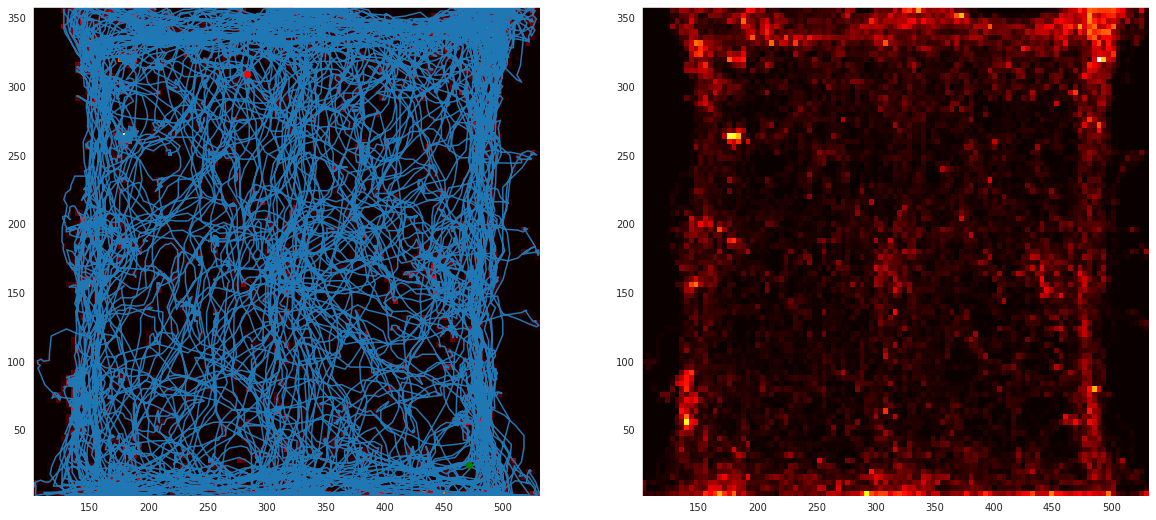

In [9]:
pc.plot_occupation_map()

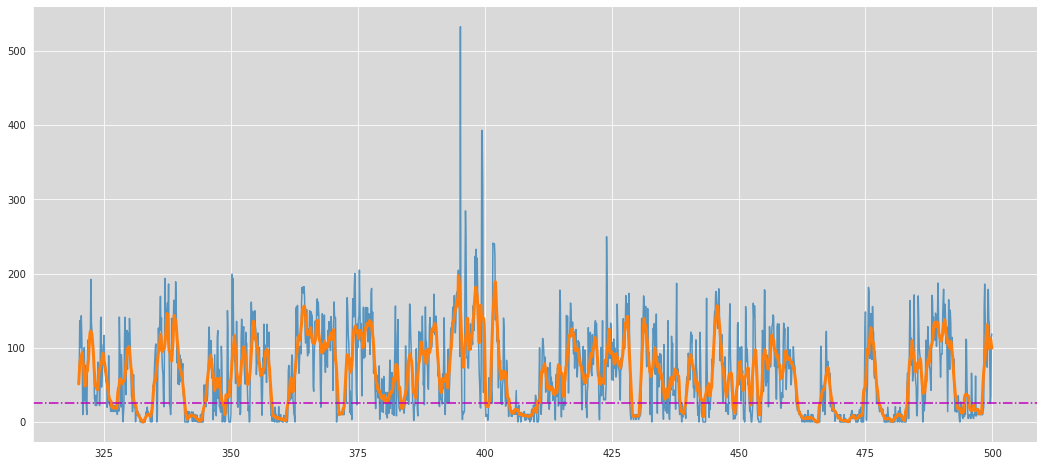

In [10]:
pc.plot_speed(start=0, stop=500, v_cutoff=v_cutoff);

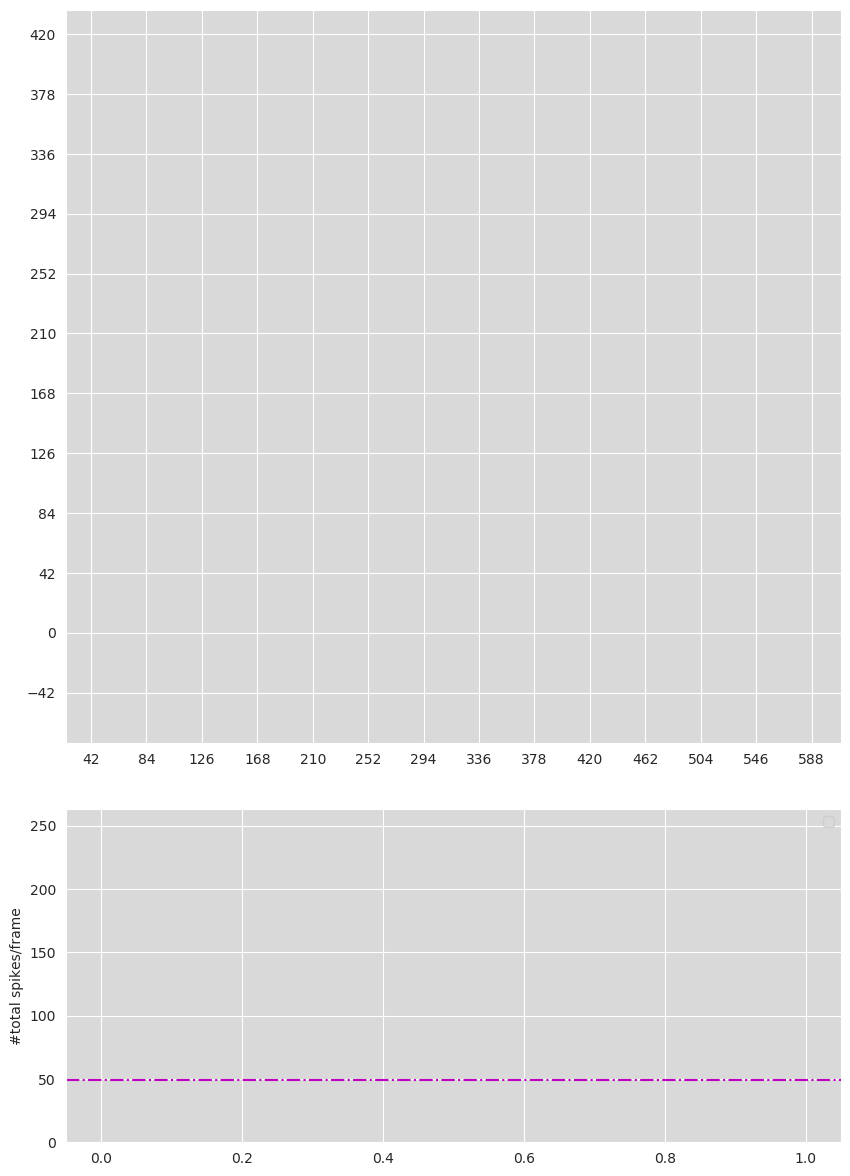

In [11]:
decoder_viewer(pc.pos, fs=8, mua_count=pc.v_smoothed)

## PC load spktag

79 neurons extracted


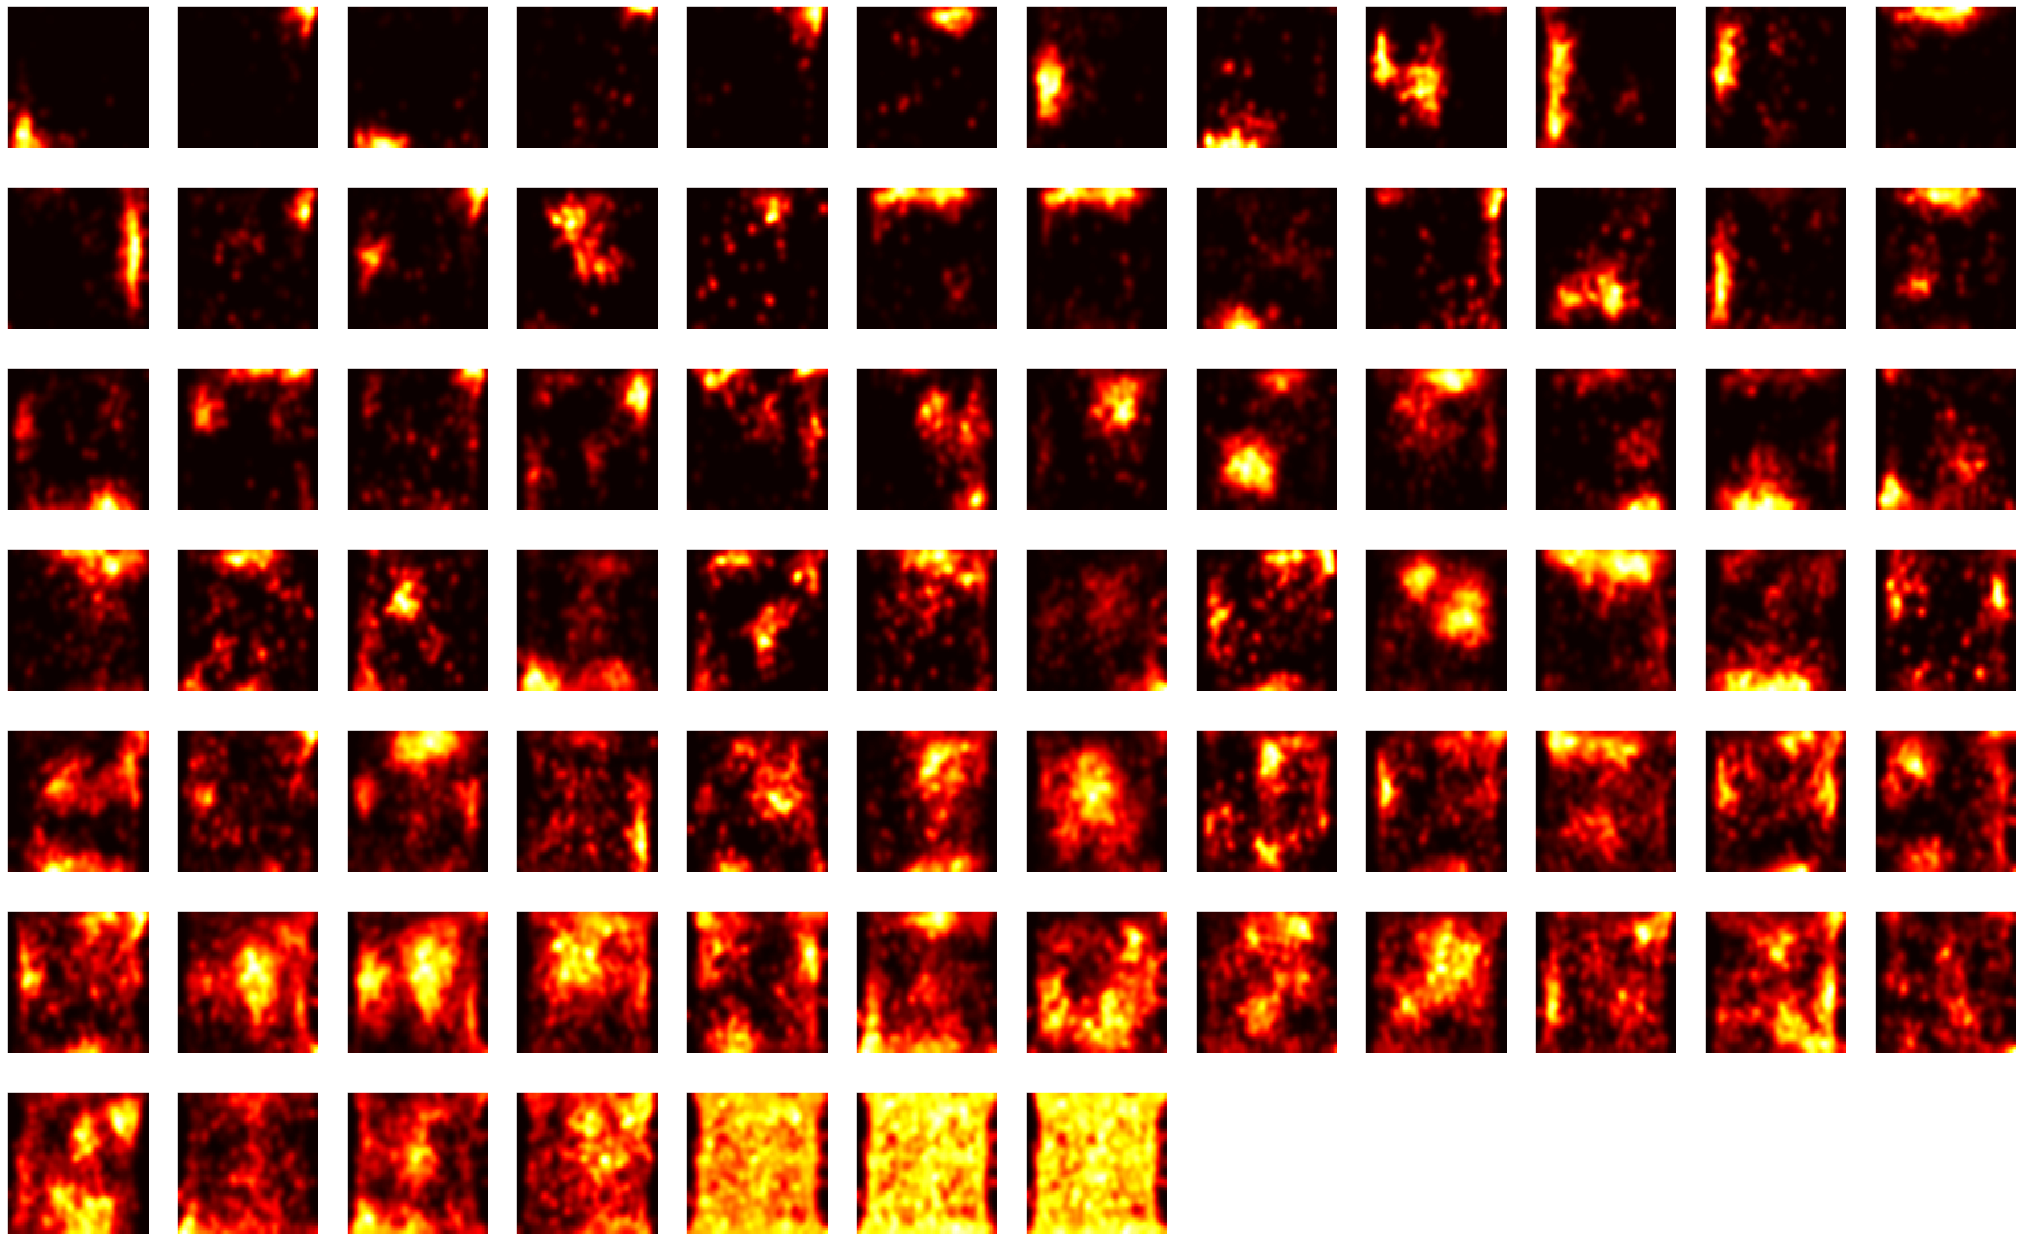

In [12]:
pc.load_spktag('./spktag/test_allspikes', show=True)

## Bayesian Decoding

In [13]:
from spiketag.utils import decoder_viewer
from spiketag.analysis.decoder import NaiveBayes

In [14]:
dec = NaiveBayes(t_step=25e-3, t_window=10*25e-3)

In [15]:
dec.connect_to(pc)

In [16]:
dec.partition(training_range=[0.0, 1.0], valid_range=[0.5, 0.6], testing_range=[0.0, 1.0],
              low_speed_cutoff={'training': True, 'testing': False})

59727 training samples
6635 validation samples
87197 testing samples


In [17]:
score = dec.auto_pipeline(smooth_sec=2)

r2 score: [0.91099126 0.90831264]



In [18]:
scv = pc.get_scv(t_window=10*25e-3)

In [19]:
pos_out = dec.predict(scv)

In [20]:
pos_out

array([[ 85.2, 202.8],
       [122.4, 273.6],
       [165.2, 336.4],
       ...,
       [210. ,  71.6],
       [116.8,  55.2],
       [ 73.2,  46.8]])

In [21]:
np.allclose(dec.X_test, scv)

True

In [22]:
%pylab qt

Populating the interactive namespace from numpy and matplotlib


In [23]:
fx = dec.X_test.sum(axis=1)

In [26]:
ani_bt = decoder_viewer(pos=dec.y_test, pos_compare=pos_out[5:], mua_count=fx,
                        start = 79350, stop= 79350+5200,
                        fs=pc.fs, length=500, interval=1/pc.fs, 
                        blit=True, player=True)

In [ ]:
ani_bt.save('bayesian_output_example1.mp4', writer='ffmpeg', codec='h264', fps=60)